# Tarea 1 - Regresion Multiple

Analisis, tratamiento, prueba e implementacion de Regresion Lineal Multpile para la prediccion de precios de casas.

## 1. Carga de datos

In [1]:
#Importacion de librerias

import pandas as pd # data processing
import numpy as np # numeric computation
import matplotlib.pyplot as plt # plot visualization
%matplotlib inline
import seaborn as sns # data visualisation
color = sns.color_palette()
sns.set_style('darkgrid')
import scipy.stats as st # statistics
pd.options.display.max_columns = None # show all columns
import missingno as msno # missing data visualizations and utilities
import warnings # ignore file warnings
warnings.filterwarnings('ignore')

## Carga del dataset

In [2]:
trainData = pd.read_csv('input/train.csv') #datos de entrenamiento
testData = pd.read_csv('input/test.csv') #datos de prueba
trainData.drop(columns = 'Id', inplace =True)
y_train = trainData['SalePrice'] #precios de casas

## 2. Analisis del dataset

In [3]:
#tamaño del dataset
trainData.shape , testData.shape, y_train.shape

((1460, 80), (1459, 80), (1460,))

In [4]:
#descripcion de las columnas (caracteristicas)
trainData.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#caracteristicas numericas
trainData.select_dtypes(include=[np.number]).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
#Caracteristicas categoricas
trainData.select_dtypes(include=[np.object]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

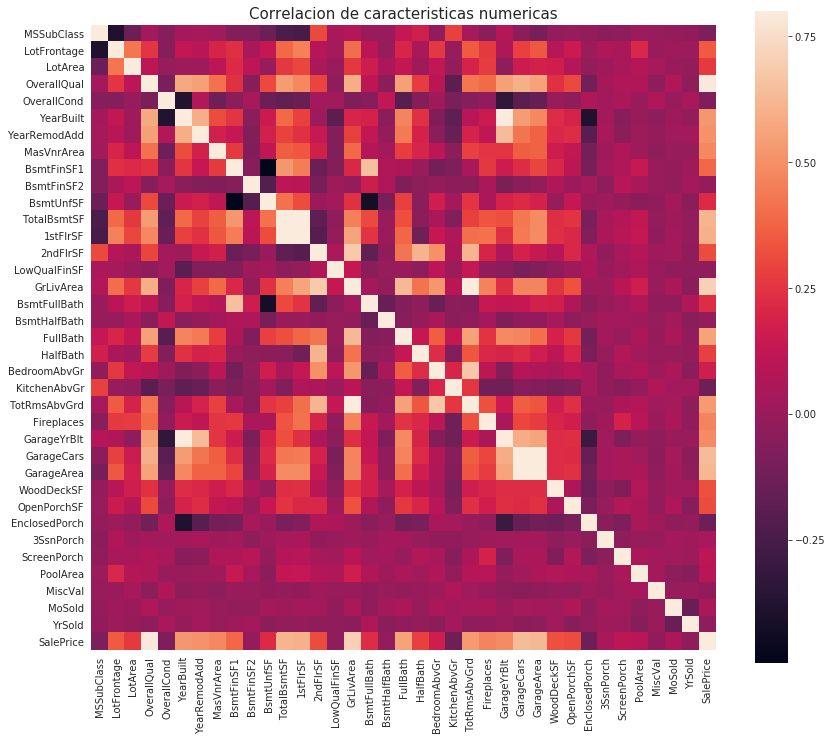

In [7]:
#Correlacion: Entre todas las caracteristicas con "SalePrice"

correlation = trainData.select_dtypes(include=[np.number]).corr()

#grafica de calor
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlacion de caracteristicas numericas',size=15)
sns.heatmap(correlation,square = True,  vmax=0.8)

Si analizamos la grafica anterior podemos observar dos cuadrados blancos grandes (uno de 2x2 y otro de 3x3), esto indica una alta correlacion entre las variables: 'TotalBsmtSF' y '1stFlrSF', y el segundo grupo la correlacion entre GarageYrBlt', 'GarageCars' y 'GarageArea'.


Podemos observar tambien las caracteristicas que tienen una alta correlacion con 'SalePrice', estas son: 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'FullBath', 'TotRmsAbvGrd' y 'YearBuilt'.

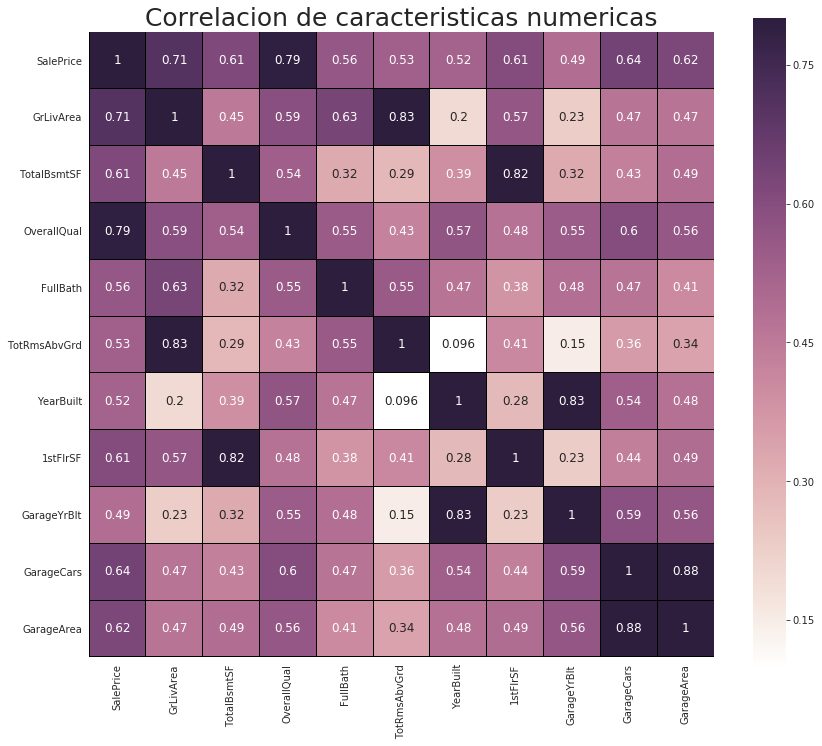

In [8]:
#Zoom de las caractisticas de interes (mas correlacionadas)

zoomedCorrelation = correlation.loc[['SalePrice','GrLivArea','TotalBsmtSF','OverallQual','FullBath','TotRmsAbvGrd','YearBuilt','1stFlrSF','GarageYrBlt','GarageCars','GarageArea'], ['SalePrice','GrLivArea','TotalBsmtSF','OverallQual','FullBath','TotRmsAbvGrd','YearBuilt','1stFlrSF','GarageYrBlt','GarageCars','GarageArea']]
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlacion de caracteristicas numericas',size=25)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(zoomedCorrelation, square = True, linewidths=0.01, vmax=0.8, annot=True,cmap=cmap,
            linecolor="black", annot_kws = {'size':12})

Podemos concluir entonces:
- 'TotalBsmtSF' y '1stFlrSF' estan fuertemente correlacionadas
- 'TotRmsAbvGrd' y 'GrLivArea' estan fuertemente correlacionadas
- 'GarageCars' y 'GarageArea' estan fuertemente correlacionadas
- 'GarageYrBlt' y 'YearBuilt' estan fuertemente correlacionadas
- 'TotRmsAbvGrd' y 'GrLivArea' estan fuertemente correlacionadas
- 'OverallQual', 'GrLivArea' y 'TotRmsAbvGrd' estan fuertemente correlacionadas con 'SalePrice'

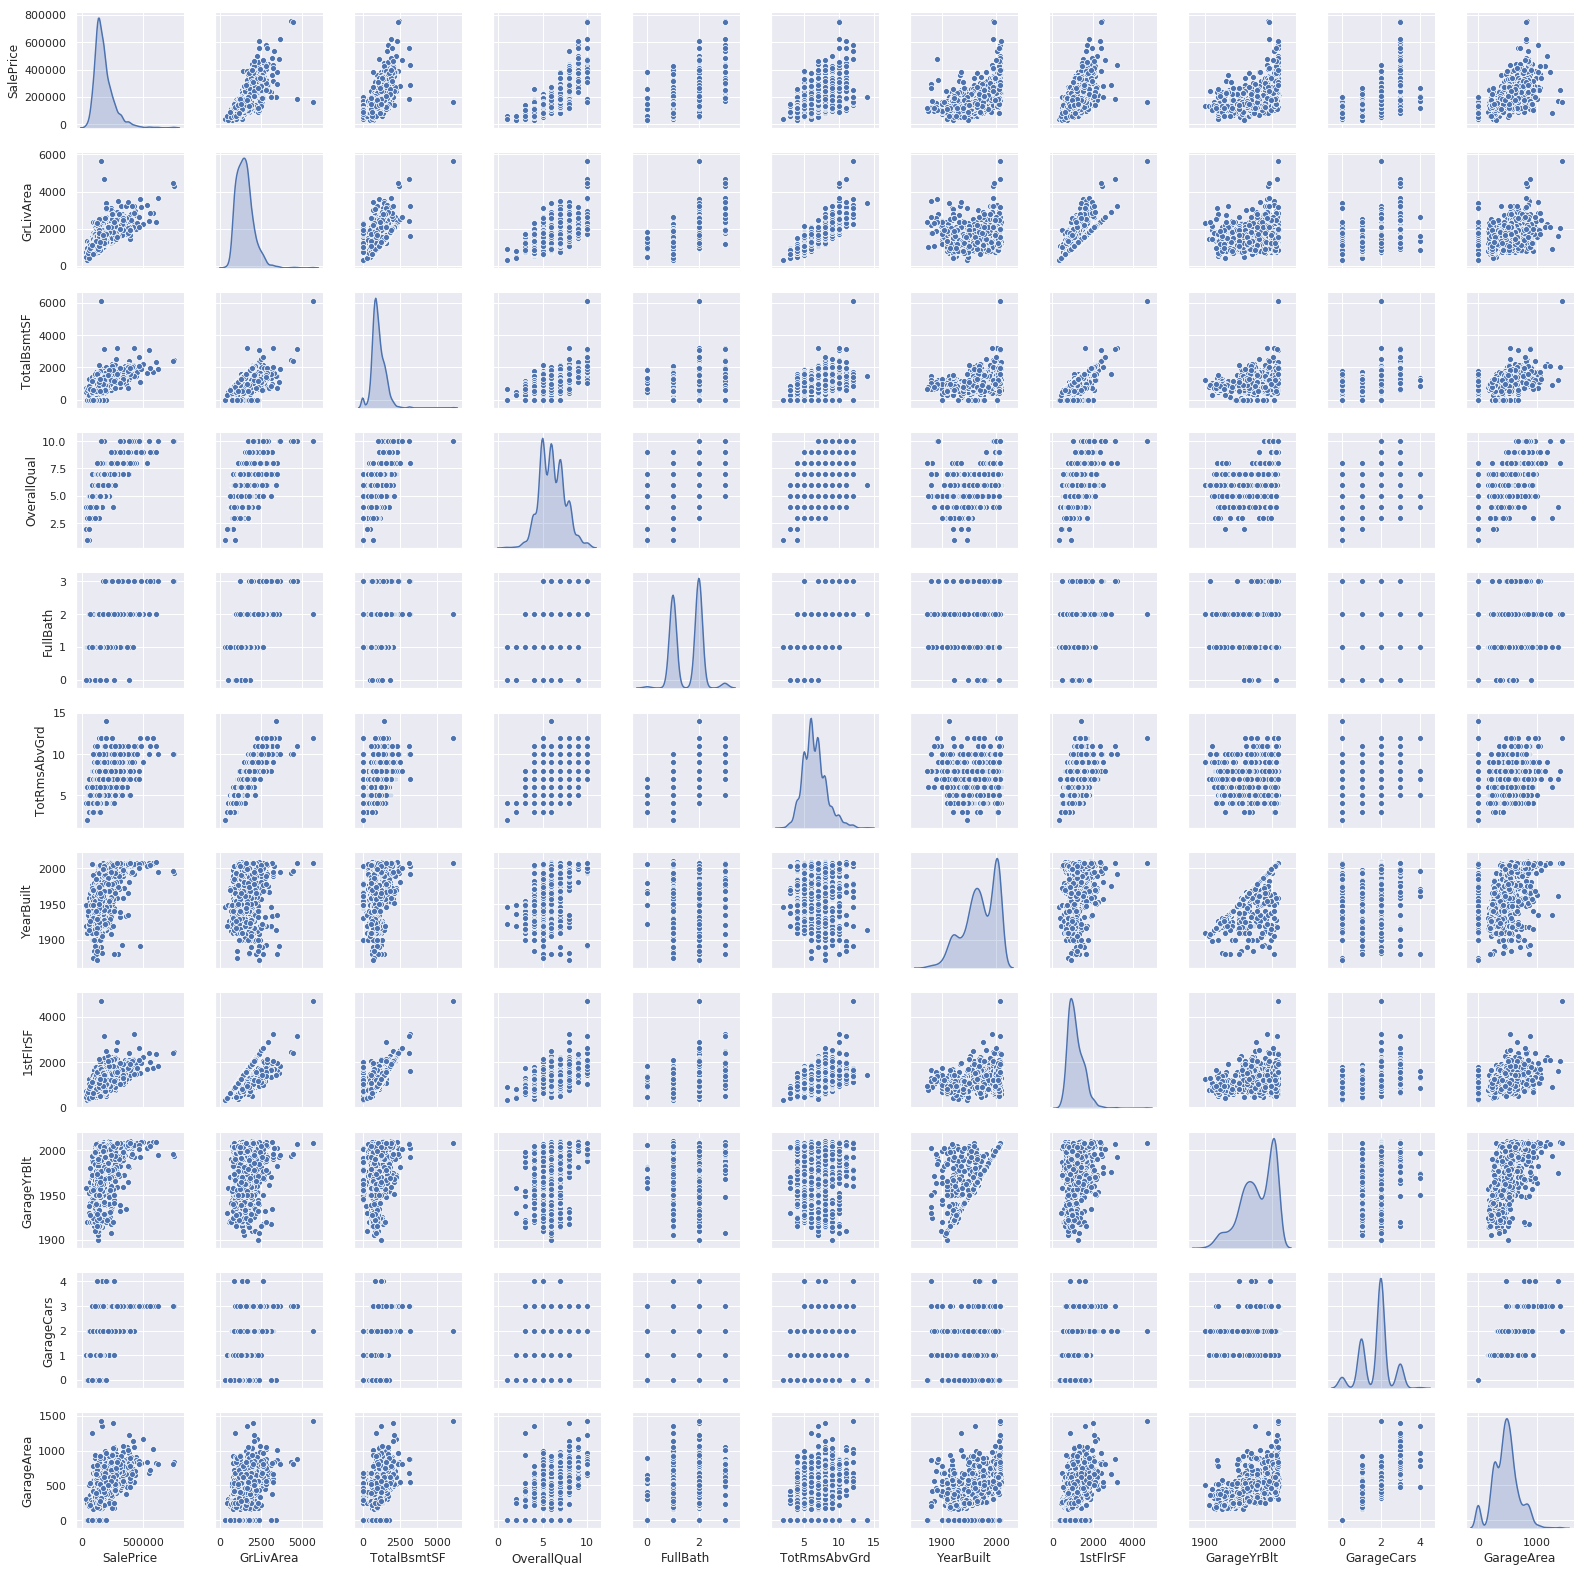

In [9]:
#graficas por pares

sns.set()
cols = ['SalePrice','GrLivArea','TotalBsmtSF','OverallQual','FullBath','TotRmsAbvGrd','YearBuilt','1stFlrSF','GarageYrBlt','GarageCars','GarageArea']
sns.pairplot(trainData[cols],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Podemos observar que 'SalePrice' crece exponencialmente a medida que se incrementan las caracteristicas: 'TotalBsmtSF', 'GrLivArea', '1stFlrSF' y 'OverallQual'.

## 3. Limpieza de Datos

De las graficas anteriores podemos observar valores atipicos en las caracteristicas: 'TotalBsmtSF', '1stFlrSF' y'GrLivArea'.

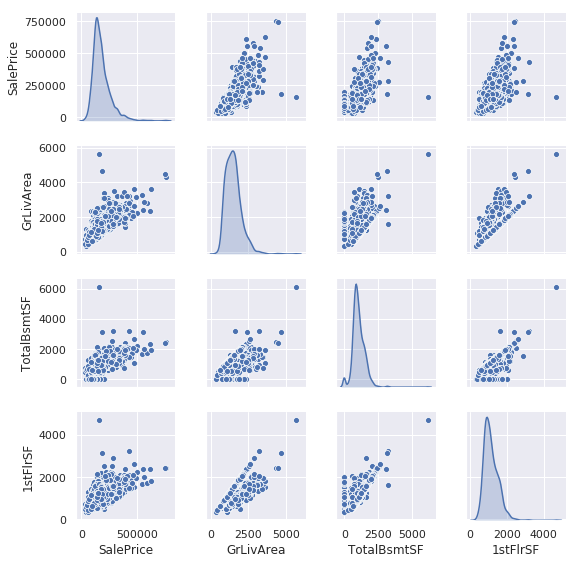

In [10]:
#grafica de caracteristicas con valores atipicos

sns.set()
cols = ['SalePrice','GrLivArea','TotalBsmtSF','1stFlrSF']
sns.pairplot(trainData[cols],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [11]:
#eliminaremos los valores atipicos

trainData.drop(trainData[trainData['TotalBsmtSF'] > 5000].index,inplace = True)
trainData.drop(trainData[trainData['1stFlrSF'] > 4000].index,inplace = True)
trainData.drop(trainData[(trainData['GrLivArea'] > 4000) & (trainData['SalePrice']<300000)].index,inplace = True)

#nuevo tamaño del dataset
trainData.shape

(1458, 80)

## Data faltante

In [12]:
total = trainData.isnull().sum().sort_values(ascending=False)
percent = (trainData.isnull().sum()/trainData.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje'])
missing_data.head(25)

,Total,Porcentaje
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


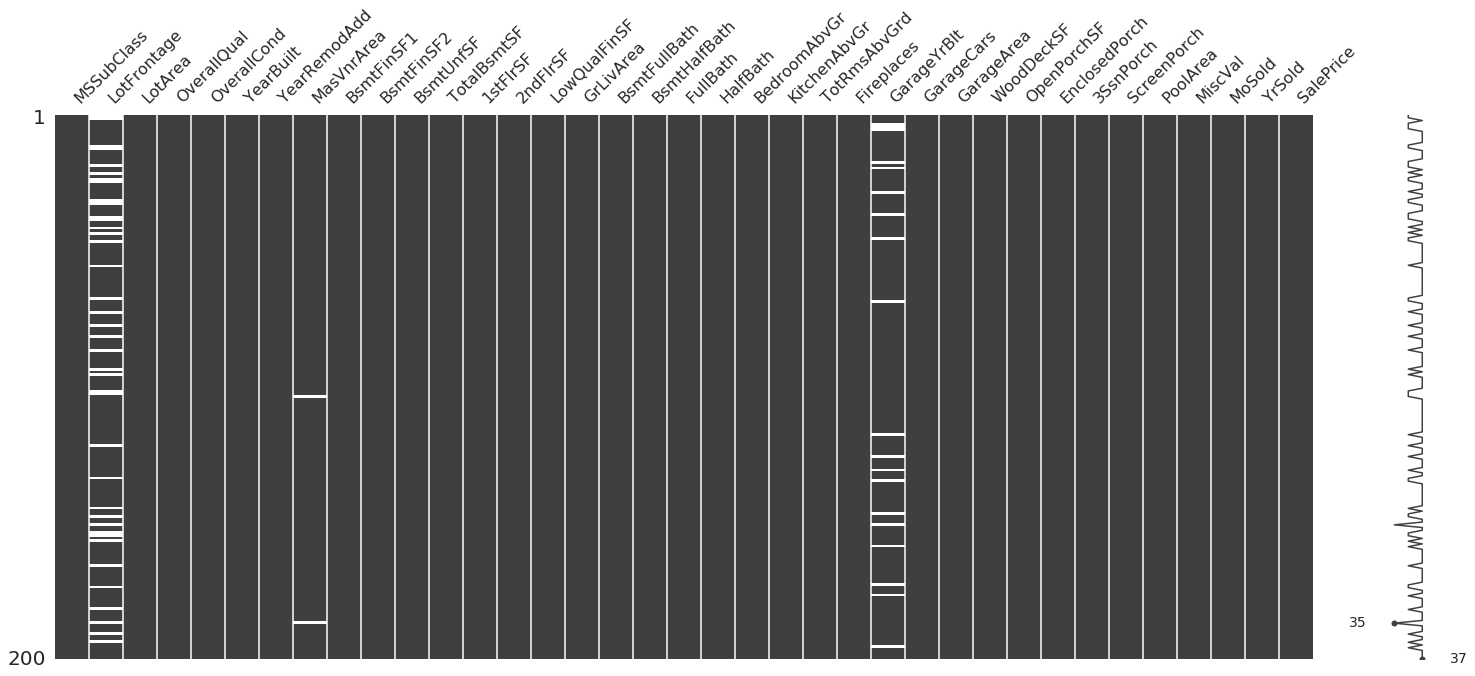

In [13]:
#visualizacion de data faltante en caracteristicas numericas

msno.matrix(trainData.select_dtypes(include=[np.number]).sample(200))

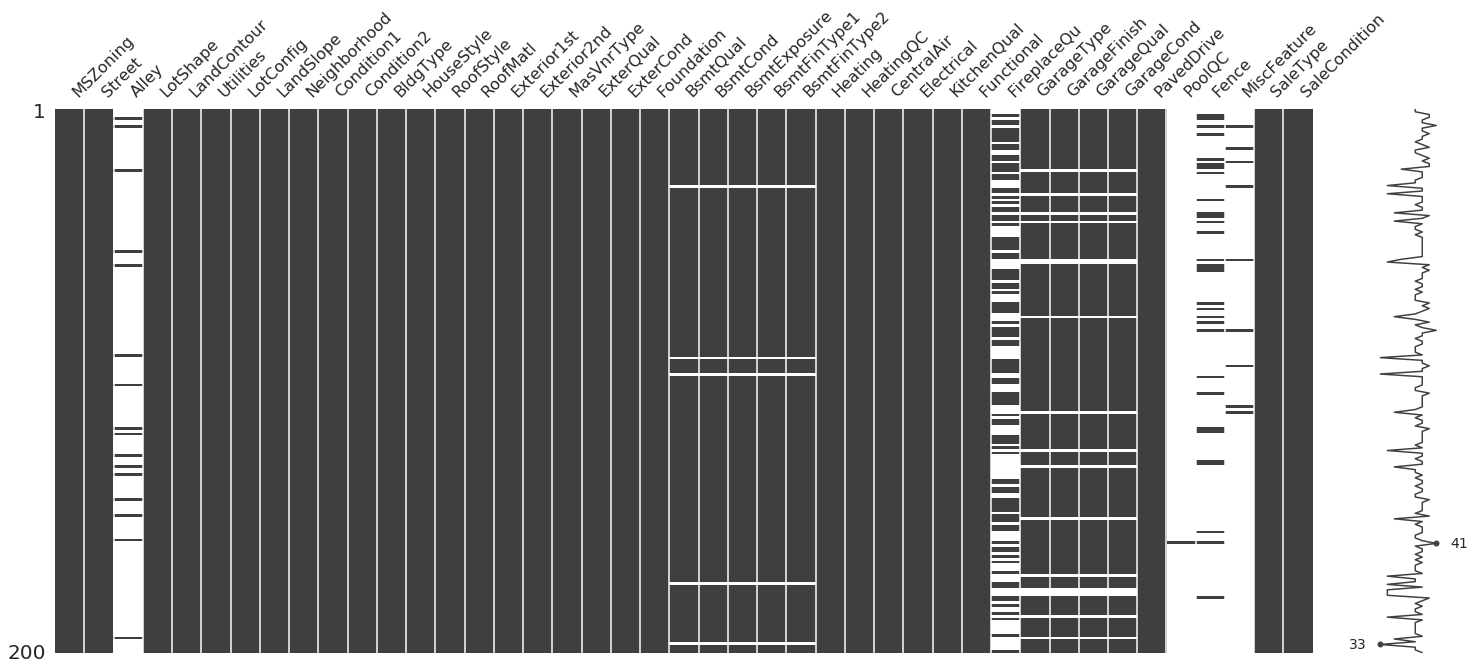

In [14]:
#visualizacion de data faltante en caracteristicas categoricas

msno.matrix(trainData.select_dtypes(include=[np.object]).sample(200))

In [15]:
# Concatenacion de los dataset de entrenamiento y test
dataFull = pd.concat([trainData,testData],ignore_index=True)
dataFull.drop('Id',axis = 1,inplace = True)
dataFull.shape

(2917, 80)

In [16]:
# Sumatoria de datos faltantes por caracteristicas
sumMissingValues = dataFull.isnull().sum()
sumMissingValues[sumMissingValues>0].sort_values(ascending = False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64

In [17]:
# CAracteristicas numericas : reemplazamos con 0
for col in ['BsmtFullBath','BsmtHalfBath','BsmtUnfSF','TotalBsmtSF','GarageCars','BsmtFinSF2','BsmtFinSF1','GarageArea']:
    dataFull[col].fillna(0,inplace= True)

# verificacion
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
Utilities          2
KitchenQual        1
SaleType           1
Exterior2nd        1
Exterior1st        1
Electrical         1
dtype: int64

In [18]:
#caracteristicas con menos de 5 valores faltantes

# Caracterisiticas categoricas : reemplazamos con la moda
for col in ['MSZoning','Functional','Utilities','KitchenQual','SaleType','Exterior2nd','Exterior1st','Electrical']:
    dataFull[col].fillna(dataFull[col].mode()[0],inplace= True)

# Verificacion
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
dtype: int64

In [19]:
# Caracteristicas con mas de 5 valores faltantes.

# Ctegorias : reemplazamos con 'None'
for col in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageQual','GarageCond','GarageFinish','GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType']:
    dataFull[col].fillna('None',inplace = True)

# verificacion
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

SalePrice      1459
LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
dtype: int64

In [20]:
# Podemos reemplazar 'MasVnrArea' con la media de la columna

dataFull['MasVnrArea'].fillna(dataFull['MasVnrArea'].mean(), inplace=True)

# Verificacion
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

SalePrice      1459
LotFrontage     486
GarageYrBlt     159
dtype: int64

In [21]:
#Existe correlacion alta entre las caracteristicas 'GarageYrBlt' y 'YearBuilt', 
#por ello reeemplazaremos los valores faltantes con valores centrales (medianas) de'YearBuilt'. 

# Particionamos 'YearBuilt' en 10 partes
dataFull['YearBuiltCut'] = pd.qcut(dataFull.YearBuilt,10)
# completamos con las medianas
dataFull['GarageYrBlt']= dataFull.groupby(['YearBuiltCut'])['GarageYrBlt'].transform(lambda x : x.fillna(x.median()))
# convertimos a enteros
dataFull['GarageYrBlt'] = dataFull['GarageYrBlt'].astype(int)
# eliminamos la columna 'YearBuiltCut'
dataFull.drop('YearBuiltCut',axis=1,inplace=True)
# verificamos
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

SalePrice      1459
LotFrontage     486
dtype: int64

In [22]:
# como en el caso anterior 'LotFrontage','LotArea' y 'LotFrontage' estan altamente correlacionadas. 
#asi que usaremos el mismo metodo


# partimos en 10 partes
dataFull['LotAreaCut'] = pd.qcut(dataFull.LotArea,10)
#completamos con las medianas
dataFull['LotFrontage']= dataFull.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))
dataFull['LotFrontage']= dataFull.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))
# eliminamos 'LotAreaCut' column
dataFull.drop('LotAreaCut',axis=1,inplace=True)

# verificamos
dataFull.isnull().sum()[dataFull.isnull().sum()>0].sort_values(ascending = False)

SalePrice    1459
dtype: int64

The only missing values that are left are within SalePrice, which is exactly the number of lignes in the test data (the values that we need to predict)

## 4. Caracteristicas

## Correccion de caracteristicas

En esta seccion veremos que caraceristicas numericas deberian convertirse en categoricas (fechas).

In [23]:
#listado de caracteristicas numericas
dataFull.select_dtypes(include=[np.number]).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [24]:
strCols = ['YrSold','YearRemodAdd','YearBuilt','MoSold','MSSubClass','GarageYrBlt']
for i in strCols:
    dataFull[i]=dataFull[i].astype(str)

## Añadiendo caracteristicas

Converterimos las caracteristicas categoricas a valores numericos.

In [25]:
#caracteristicas categoricas

dataFull.select_dtypes(include=[np.object]).columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MoSold', 'Neighborhood', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [26]:
dataFull["oExterQual"] = dataFull.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
dataFull["oBsmtQual"] = dataFull.BsmtQual.map({'None':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
dataFull["oBsmtExposure"] = dataFull.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
dataFull["oHeatingQC"] = dataFull.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
dataFull["oKitchenQual"] = dataFull.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
dataFull["oFireplaceQu"] = dataFull.FireplaceQu.map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})
dataFull["oGarageFinish"] = dataFull.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
dataFull["oPavedDrive"] = dataFull.PavedDrive.map({'N':1, 'P':2, 'Y':3})

Agruparemos algunas caracteristicas para que tengan un mayor sentido.

In [27]:
dataFull.select_dtypes(include=[np.number]).columns


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'oExterQual', 'oBsmtQual', 'oBsmtExposure',
       'oHeatingQC', 'oKitchenQual', 'oFireplaceQu', 'oGarageFinish',
       'oPavedDrive'],
      dtype='object')

In [28]:
dataFull['HouseSF'] = dataFull['1stFlrSF'] + dataFull['2ndFlrSF'] + dataFull['TotalBsmtSF']
dataFull['PorchSF'] = dataFull['3SsnPorch'] + dataFull['EnclosedPorch'] + dataFull['OpenPorchSF'] + dataFull['ScreenPorch']
dataFull['TotalSF'] = dataFull['HouseSF'] + dataFull['PorchSF'] + dataFull['GarageArea']

## Codificacion de etiquetas

En esta parte codificaremos las caracteristicas categoricas a valores numericos.

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder, Imputer
from scipy.stats import skew

# Label encoding class
class labenc(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        label = LabelEncoder()
        X['YrSold']=label.fit_transform(X['YrSold'])
        X['YearRemodAdd']=label.fit_transform(X['YearRemodAdd'])
        X['YearBuilt']=label.fit_transform(X['YearBuilt'])
        X['MoSold']=label.fit_transform(X['MoSold'])
        X['GarageYrBlt']=label.fit_transform(X['GarageYrBlt'])
        return X
    
# Skewness transform class
class skewness(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        skewness = X.select_dtypes(include=[np.number]).apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= 1].index
        X[skewness_features] = np.log1p(X[skewness_features])
        return X

# One hot encoding class
class onehotenc(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X = pd.get_dummies(X)
        return X

In [30]:
# Creating a copy of the full dataset
dataFullCopy = dataFull.copy()

# Creating a new fata with aplied transformations using sklearn Pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('labenc',labenc()),('skewness',skewness()),('onehotenc',onehotenc())])
dataPipeline = pipeline.fit_transform(dataFullCopy)
dataFull.shape, dataPipeline.shape

((2917, 91), (2917, 328))

Podemos observar que se incremento el numero de caracteristicas de 88 a 328.

In [31]:
dataPipeline.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,oExterQual,oBsmtQual,oBsmtExposure,oHeatingQC,oKitchenQual,oFireplaceQu,oGarageFinish,oPavedDrive,HouseSF,PorchSF,TotalSF,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_

In [32]:
#dividimos la data transformada a conjuntos de entrenamiento y pruebas

X_train = dataPipeline[:trainData.shape[0]]
y_train = X_train['SalePrice']
X_train.drop(columns = 'SalePrice', inplace=True)
X_test = dataPipeline[trainData.shape[0]:]
X_test.drop(columns = 'SalePrice', inplace=True)
X_train.shape, y_train.shape, X_test.shape

((1458, 327), (1458,), (1459, 327))

## 5. Normalizacion de los datos

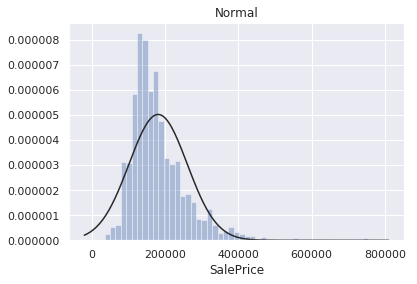

In [33]:
# Distribucion normal 

plt.figure(2); plt.title('Normal')
sns.distplot(y_train, kde=False, fit=st.norm)

Podemos observar que la data no se ajusta a una distribucion normal por lo que debemos transformar los datos antes de aplicar un modelo.

In [34]:
# transformando 'SalePrice' a una distribucion normal

y_train_transformed = np.log(y_train)
y_train_transformed.skew(), y_train_transformed.kurt()

(0.12156821443518166, 0.8047636129011364)

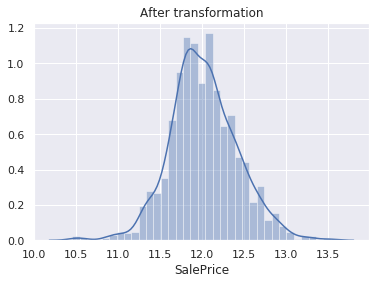

In [35]:
#verificamos la transformacion

plt.figure(2); plt.title('After transformation')
sns.distplot(y_train_transformed)

In [36]:
# Using Robust Scaler to transform X_train
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit(X_train).transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

In [37]:
# Shape of final data we will be working on
X_train_scaled.shape, y_train_transformed.shape, X_test_scaled.shape

((1458, 327), (1458,), (1459, 327))

## 6. Seleccion de caracteristicas

## Analisis de Componentes Principales (PCA)

Reduciremos las dimensiones del dataset demiante nuevas variables que expliquen mejor la varianza de los datos

In [38]:
from sklearn.decomposition import PCA
# Concatenate the training and test datasets into a single datafram
dataFull2 = np.concatenate([X_train_scaled,X_test_scaled])
# Choose the number of principle components such that 95% of the variance is retained
pca = PCA(0.95)
dataFull2 = pca.fit_transform(dataFull2)
varPCA = np.round(pca.explained_variance_ratio_*100, decimals = 1)
# Principal Component Analysis of data
print(varPCA)

[17.6  8.9  7.5  5.4  4.5  4.1  3.5  2.9  2.6  2.4  1.9  1.6  1.5  1.4
  1.2  1.2  1.1  1.1  1.   0.9  0.9  0.9  0.8  0.8  0.7  0.7  0.7  0.6
  0.6  0.6  0.6  0.5  0.5  0.5  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4
  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1]


In [39]:
# Shape of final data we will be working on
X_train_scaled = dataFull2[:trainData.shape[0]]
X_test_scaled = dataFull2[trainData.shape[0]:]
X_train_scaled.shape, y_train_transformed.shape, X_test_scaled.shape
X_test_scaled.shape

(1459, 87)

## 7. Prueba de modelos

In [51]:
# importing the models
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso, SGDRegressor, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR,SVR
# creating the models
models = [
             LinearRegression(),
             SVR(),
             SGDRegressor(),
             SGDRegressor(max_iter=1000, tol = 1e-3),
             GradientBoostingRegressor(),
             RandomForestRegressor(),
             Lasso(),
             Lasso(alpha=0.01,max_iter=10000),
             Ridge(),
             BayesianRidge(),
             KernelRidge(),
             KernelRidge(alpha=0.6,kernel='polynomial',degree = 2,coef0=2.5),
             ElasticNet(),
             ElasticNet(alpha = 0.001,max_iter=10000),    
             ExtraTreesRegressor(),
             ]

names = ['Linear regression','Support vector regression'
         ,'Stochastic gradient descent',
         'Stochastic gradient descent 2','Gradient boosting tree','Random forest',
         'Lasso regression','Lasso regression 2','Ridge regression','Bayesian ridge regression',
         'Kernel ridge regression','Kernel ridge regression 2','Elastic net regularization',
         'Elastic net regularization 2','Extra trees regression'
        ]

In [41]:
# Funcion root mean square error

def rmse(model,X,y):
    type(model)
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5))
    return rmse

## Validacion cruzada (modelos)

In [42]:
from sklearn.model_selection import KFold,cross_val_score
warnings.filterwarnings('ignore')

#  5-folds cross-validation para modelos
for model, name in zip(models, names):
    # Root mean square error
    score = rmse(model,X_train_scaled,y_train_transformed)
    print("- {} : mean : {:.6f}".format(name, score.mean()))
    
#lm = LinearRegression()
#lm.fit(X_train_scaled,y_train_transformed)
#predTrain = lm.predict(X_train_scaled)
#predTest = lm.predict(X_test_scaled)
#res=np.exp(predTest)


- Linear regression : mean : 0.117175
- Support vector regression : mean : 0.126343
- Stochastic gradient descent : mean : 0.218399
- Stochastic gradient descent 2 : mean : 0.141945
- Gradient boosting tree : mean : 0.132631
- Random forest : mean : 0.150868
- Lasso regression : mean : 0.397219
- Lasso regression 2 : mean : 0.136097
- Ridge regression : mean : 0.117089
- Bayesian ridge regression : mean : 0.116271
- Kernel ridge regression : mean : 12.861028
- Kernel ridge regression 2 : mean : 0.114503
- Elastic net regularization : mean : 0.260373
- Elastic net regularization 2 : mean : 0.116581
- Extra trees regression : mean : 0.150239


Si ordenamos los modelos por RMSE tendremos los mejores modelos:
- 1st : Kernel ridge regression (0.114503) 
- 2nd : Elastic net regularization and Bayesian ridge regression (0.116...)
- 3rd : Ridge regression and Linear regression (0.117175)
- 4rth : Support vector regression (0.126343) 
- 5th : Gradient boosting tree (0.132631)
- 6th : Stochastic gradient  and Lasso regression (0.141945)
- 7th : Random forest and Extra trees regression (0.150868)

## 8. Implementacion Propia: Regresion Lineal Multivariable

In [43]:
# num de iteraciones
iterations = 1500
# paso de avance (coef. de aprendizaje)
alpha = 0.01
print('X train size:',X_train_scaled.shape)
print('y train size:',y_train_transformed.shape)
print('X test size:',X_test_scaled.shape)

X train size: (1458, 87)
y train size: (1458,)
X test size: (1459, 87)


In [44]:
#Hypotesis
def h(theta,X): 
    return np.dot(X,theta)

#Funcion de costo
def computeCost(mytheta,X,y):
    #print('parametros(theta):',mytheta.shape)
    #print('X:',X.shape)
    #print('y:',y.shape)
    m = y.size # numero de ejemplos de entrenamiento
    
   
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))


initial_theta = np.zeros((X_train_scaled.shape[1],1))

#convertir panda series a numpy array
yy=np.array(y_train_transformed)
yy.shape
y_numpy=yy.reshape(1458,1)
cost = computeCost(initial_theta,X_train_scaled,y_numpy)
x_numpy = X_train_scaled
#print(cost)

##Algoritmo Gradiente Descendente

m = y_numpy.size # number of training examples
#def descendGradient(X, theta_start = np.zeros(m),y=y_numpy):
def descendGradient(X, theta_start,y): 
    #theta_start = np.zeros(nrows)
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(list(theta[:,0]))
        #Actualizacion simultanea
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

print('old size: ',x_numpy.shape)
x_numpy = np.insert(x_numpy,0,1,axis=1) #agregar el x0 valor de 1
print('new size: ',y_numpy.shape)


old size:  (1458, 87)
new size:  (1458, 1)


## Entrenamiento (Gradiente Descendente)

In [45]:
#ejecucion del algoritmo de gradiente descendente (entrenamiento del modelo)
initial_theta = np.zeros((x_numpy.shape[1],1))
theta, thetahistory, jvec = descendGradient(x_numpy,initial_theta,y_numpy)



## Verificacion de convergencia del algoritmo

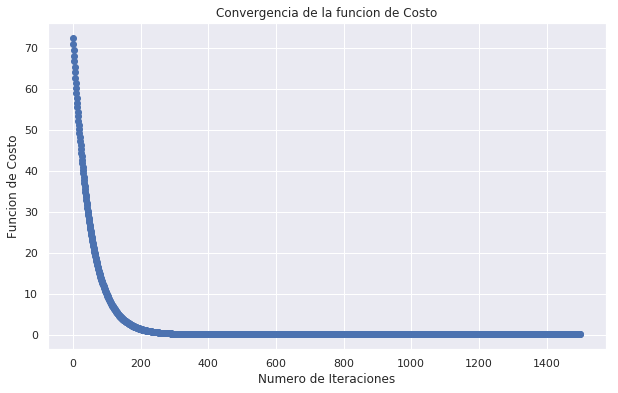

In [46]:
#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergencia de la funcion de Costo")
    plt.xlabel("Numero de Iteraciones")
    plt.ylabel("Funcion de Costo")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])

#Plot convergence of cost function:
plotConvergence(jvec)

In [47]:
print('theta size:',theta.shape)
print('X test size:',X_test_scaled.shape)
x_numpy_test = X_test_scaled
#x_numpy_test
x_numpy_test = np.insert(x_numpy_test,0,1,axis=1) #agregar el x0 valor de 1
print('X_numpy test size:',x_numpy_test.shape)
predicciones = h(theta,x_numpy_test)
submit = np.exp(predicciones)
print('predictions size:',predicciones.shape)
submit = submit.reshape(1459,)
submit

theta size: (88, 1)
X test size: (1459, 87)
X_numpy test size: (1459, 88)
predictions size: (1459, 1)


array([110241.7462875 , 149426.63528755, 176042.41782613, ...,
       181994.27903834, 120312.9023611 , 250128.06903818])

## Submit


In [48]:
# Preparar el CSV
my_submission = pd.DataFrame({'Id': testData.Id, 'SalePrice': submit})
#testData.Id.shape
#submit.shape
my_submission.to_csv('mis_predicciones.csv', index=False)

## Cross Validation

In [49]:
from sklearn.model_selection import train_test_split
data = x_numpy
target = y_numpy

X_ent, X_val, y_ent, y_val = train_test_split(data, target, shuffle=True,
                                                    test_size=0.5, random_state=49)
#print(X_ent.shape,y_ent.shape, X_val.shape, y_val.shape)
#print(x_numpy.shape)

##regresion propia
#ejecucion del algoritmo de gradiente descendente (entrenamiento del modelo)
#initial_theta = np.zeros((X_ent.shape[1],1))
m = y_ent.size # number of training examples
initial_theta = np.zeros((X_ent.shape[1],1))
theta2, thetahistory2, jvec2 = descendGradient(X_ent,initial_theta,y_ent)


In [53]:
from sklearn.metrics import mean_squared_error
X_ent.shape ,initial_theta.shape, y_ent.shape
theta2.shape
predictions = h(theta2,X_val)
#predictions = np.exp(predictions)
mse = mean_squared_error(y_val, predictions)

rmse = np.sqrt(mse)
print('RMSE (implementacion propia)=',rmse)


RMSE (implementacion propia)= 0.1607916549382386
